<a href="https://colab.research.google.com/github/abhiiiinair24/Deep-Learning/blob/main/a0_part_1_and_2_rajagop6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Pytorch

In [ ]:
import torch

In [ ]:
z = torch.zeros(5,3)
print(z)

print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [ ]:
inttype = torch.ones((3,2),dtype=torch.int16)
print(inttype)

tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int16)


In [ ]:
torch.manual_seed(150)
r1= torch.rand(2,2)
print('A random number 1')
print(r1)


r2= torch.rand(2,2)
print('A random number 2')
print(r2)

torch.manual_seed(150)
r3= torch.rand(2,2)
print('A random number 3')
print(r3)

A random number 1
tensor([[0.5975, 0.5446],
        [0.0407, 0.5811]])
A random number 2
tensor([[0.6797, 0.3908],
        [0.1752, 0.3647]])
A random number 3
tensor([[0.5975, 0.5446],
        [0.0407, 0.5811]])


In [ ]:
ones = torch.ones(2,5)
print(ones)

twos = torch.ones(2,5)*2
print(twos)

threes = ones+twos
print(threes)
print(threes.shape)

'''
r1 = torch.rand(2,5)
r2 = torch.rand(3,5)

r3 = r1+r2
print(r3)
'''

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
tensor([[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]])
torch.Size([2, 5])


'\nr1 = torch.rand(2,5)\nr2 = torch.rand(3,5)\n\nr3 = r1+r2\nprint(r3)\n'

In [ ]:
#torch.manual_seed(150)
r = torch.rand(2,2) - 0.5*2
print(r)

print('Absolute value of r: ')
print(torch.abs(r))

print('Max value of r: ')
print(torch.max(r))

print('Average and standard deviation of r: ')
print(torch.std_mean(r))

print('Sum of r: ')
print(torch.sum(r))

print('Inverse sine of r')
print(torch.asin(r))


tensor([[-0.3203, -0.6092],
        [-0.8248, -0.6353]])
Absolute value of r: 
tensor([[0.3203, 0.6092],
        [0.8248, 0.6353]])
Max value of r: 
tensor(-0.3203)
Average and standard deviation of r: 
(tensor(0.2082), tensor(-0.5974))
Sum of r: 
tensor(-2.3897)
Inverse sine of r
tensor([[-0.3260, -0.6551],
        [-0.9699, -0.6884]])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet,self).__init__()

    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,12,3)
    self.fc1 = nn.Linear(12*6*6,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *=s

    return num_features

In [ ]:
net = LeNet()
print('Creating the object: ',net)

input = torch.rand(1,1,32,32)
print('\nDataset/image batch shape: ')
print(input.shape)

output = net(input)
print('\nRaw output: ')
print(output)
print(output.shape)

Creating the object:  LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=432, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Dataset/image batch shape: 
torch.Size([1, 1, 32, 32])

Raw output: 
tensor([[-0.0006,  0.0058, -0.0123,  0.1195, -0.0495,  0.0948,  0.0264, -0.1020,
         -0.0289, -0.0285]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [ ]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

In [ ]:
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True,num_workers=2)

 frog horse plane  deer


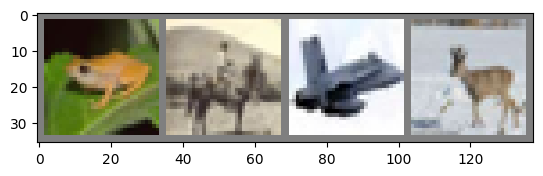

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainLoader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

horse  frog  bird  ship


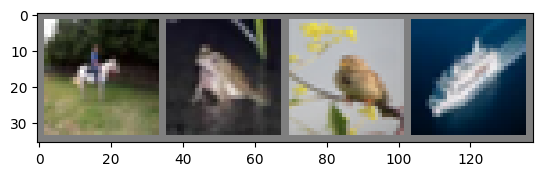

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.253
[1,  4000] loss: 1.914
[1,  6000] loss: 1.709
[1,  8000] loss: 1.590
[1, 10000] loss: 1.544
[1, 12000] loss: 1.503
[2,  2000] loss: 1.416
[2,  4000] loss: 1.401
[2,  6000] loss: 1.373
[2,  8000] loss: 1.347
[2, 10000] loss: 1.298
[2, 12000] loss: 1.300
Finished Training


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


Introduction to Pytorch Sensors


In [ ]:
import torch
import math

In [ ]:
x = torch.empty(4, 3)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[ 8.7777e-15,  0.0000e+00,  1.4013e-45],
        [ 0.0000e+00,  5.1608e-18,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.7012e-15],
        [ 0.0000e+00, -3.4503e+13,  4.4270e-41]])


In [ ]:
x = torch.empty(3, 4, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([3, 4, 3])
tensor([[[2.1715e-18, 1.6822e-04, 1.0617e-08],
         [1.0256e-08, 3.3856e-06, 1.3074e+22],
         [4.3916e-05, 8.3753e-10, 2.6822e+23],
         [1.6705e-07, 2.6948e-09, 2.6076e-09]],

        [[2.1707e-18, 1.6678e+19, 7.0976e+22],
         [2.1715e-18, 4.2330e+21, 1.6534e+19],
         [1.1625e+27, 1.4580e-19, 7.1856e+22],
         [4.3605e+27, 1.5766e-19, 7.1856e+22]],

        [[4.3605e+27, 1.4580e-19, 1.8179e+31],
         [1.8524e+28, 2.1715e-18, 1.6822e-04],
         [1.0617e-08, 1.0256e-08, 3.3856e-06],
         [1.3074e+22, 4.3916e-05, 8.3753e-10]]])
torch.Size([3, 4, 3])
tensor([[[ 4.0195e-15,  0.0000e+00,  2.8630e-15],
         [ 0.0000e+00,  1.5695e-43,  0.0000e+00],
         [ 4.4842e-44,  0.0000e+00,  6.3558e-15],
         [ 0.0000e+00,  0.0000e+00,  1.4013e-45]],

        [[ 0.0000e+00,  0.0000e+00,  1.8077e-43],
         [ 0.0000e+00,  1.6102e-15,  0.0000e+00],
         [ 3.2331e-15,  0.0000e+00, -9.2794e+05],
         [ 4.4270e-41,  1.1116e-14

In [ ]:
some_constants = torch.tensor([[2.4124, 5.71803], [3.6908, 0.0097]])
print(some_constants)

some_integers = torch.tensor((1, 3, 5, 7, 11, 14, 16, 18))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[2.4124, 5.7180],
        [3.6908, 0.0097]])
tensor([ 1,  3,  5,  7, 11, 14, 16, 18])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [ ]:
a = torch.ones((4, 3), dtype=torch.int16)
print(a)

b = torch.rand((3, 4), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[19.1502,  1.2382, 16.5415, 16.9722],
        [ 4.6475,  4.1936, 14.0625,  5.8341],
        [18.5701, 12.8446, 14.5580,  2.2146]], dtype=torch.float64)
tensor([[19,  1, 16, 16],
        [ 4,  4, 14,  5],
        [18, 12, 14,  2]], dtype=torch.int32)


In [ ]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [ ]:
powers2 = twos ** torch.tensor([[3, 5], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 8., 32.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


In [ ]:
rand = torch.rand(5,6)
doubled = rand * (torch.ones(1,6) * 5)


print(rand)
print(doubled)
print(rand)
print(doubled)

tensor([[0.7625, 0.5043, 0.9192, 0.5581, 0.3221, 0.2044],
        [0.4266, 0.8642, 0.7823, 0.9103, 0.5978, 0.9637],
        [0.3603, 0.8911, 0.8457, 0.1319, 0.5513, 0.9464],
        [0.4608, 0.8324, 0.6802, 0.7034, 0.9088, 0.0883],
        [0.6811, 0.5730, 0.1119, 0.4209, 0.1967, 0.0365]])
tensor([[3.8127, 2.5215, 4.5961, 2.7904, 1.6104, 1.0222],
        [2.1328, 4.3212, 3.9115, 4.5514, 2.9891, 4.8184],
        [1.8014, 4.4554, 4.2286, 0.6594, 2.7563, 4.7318],
        [2.3038, 4.1620, 3.4011, 3.5168, 4.5440, 0.4417],
        [3.4055, 2.8650, 0.5593, 2.1044, 0.9835, 0.1823]])
tensor([[0.7625, 0.5043, 0.9192, 0.5581, 0.3221, 0.2044],
        [0.4266, 0.8642, 0.7823, 0.9103, 0.5978, 0.9637],
        [0.3603, 0.8911, 0.8457, 0.1319, 0.5513, 0.9464],
        [0.4608, 0.8324, 0.6802, 0.7034, 0.9088, 0.0883],
        [0.6811, 0.5730, 0.1119, 0.4209, 0.1967, 0.0365]])
tensor([[3.8127, 2.5215, 4.5961, 2.7904, 1.6104, 1.0222],
        [2.1328, 4.3212, 3.9115, 4.5514, 2.9891, 4.8184],
        [1.

In [ ]:
a =     torch.ones(5, 7, 4)

b = a * torch.rand(   7, 4) # 3rd & 2nd dim are now identical to a, dim 1 absent
print(b)

c = a * torch.rand(   7, 1) # 3rd dim  are now 1 , 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 4) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.6714, 0.0968, 0.0368, 0.5600],
         [0.3388, 0.1846, 0.4954, 0.9901],
         [0.7199, 0.8955, 0.6080, 0.4348],
         [0.5844, 0.2808, 0.1378, 0.8357],
         [0.5784, 0.7157, 0.5467, 0.0734],
         [0.6033, 0.9834, 0.6534, 0.7029],
         [0.0265, 0.0491, 0.4750, 0.7282]],

        [[0.6714, 0.0968, 0.0368, 0.5600],
         [0.3388, 0.1846, 0.4954, 0.9901],
         [0.7199, 0.8955, 0.6080, 0.4348],
         [0.5844, 0.2808, 0.1378, 0.8357],
         [0.5784, 0.7157, 0.5467, 0.0734],
         [0.6033, 0.9834, 0.6534, 0.7029],
         [0.0265, 0.0491, 0.4750, 0.7282]],

        [[0.6714, 0.0968, 0.0368, 0.5600],
         [0.3388, 0.1846, 0.4954, 0.9901],
         [0.7199, 0.8955, 0.6080, 0.4348],
         [0.5844, 0.2808, 0.1378, 0.8357],
         [0.5784, 0.7157, 0.5467, 0.0734],
         [0.6033, 0.9834, 0.6534, 0.7029],
         [0.0265, 0.0491, 0.4750, 0.7282]],

        [[0.6714, 0.0968, 0.0368, 0.5600],
         [0.3388, 0.1846, 0.4954, 0.9901],
     

In [ ]:

a = torch.rand(2, 4) * 2 - 2
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))


angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)



b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))


d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)
print(torch.eq(d, e))



print(torch.max(d))
print(torch.max(d).item())
print(torch.mean(d))
print(torch.std(d))
print(torch.prod(d))
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2])))


v1 = torch.tensor([1., 0., 0.])
v2 = torch.tensor([0., 1., 0.])
m1 = torch.rand(2, 2)
m2 = torch.tensor([[3., 0.], [0., 3.]])


print(torch.linalg.cross(v2, v1))
print(m1)
m3 = torch.linalg.matmul(m1, m2)
print(m3)
print(torch.linalg.svd(m3))

Common functions:
tensor([[1.5717, 1.3274, 1.2192, 0.3360],
        [0.3637, 1.2498, 1.6270, 1.2802]])
tensor([[-1., -1., -1., -0.],
        [-0., -1., -1., -1.]])
tensor([[-2., -2., -2., -1.],
        [-1., -2., -2., -2.]])
tensor([[-0.5000, -0.5000, -0.5000, -0.3360],
        [-0.3637, -0.5000, -0.5000, -0.5000]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])
tensor([3, 2, 1])
tensor([[ True, False],
        [False, False]])
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])
tensor([ 0.,  0., -1.])
tensor([[0.4640, 0.9179],
        [0.9573, 0.7729]])
tensor([[1.3920, 2.7536],
        [2.8718, 2.3186]])
torch.return_types.linalg_svd(
U=tensor([[-0.6349, -0.7726],
        [-0.7726,  0.6349]]),
S=tensor([4.7069, 0.9944]),
Vh=tensor([[-0.6591, -0.7520],
        [ 0.7520, -0.6591]]))


In [ ]:
a = torch.tensor([0, math.pi / 2, math.pi / 5, 4 * math.pi / 4])
print('a value:')
print(a)
print(torch.sin(a))
print(a)

b = torch.tensor([0, math.pi / 6, math.pi / 1, 3 * math.pi / 4])
print('\nb value:')
print(b)
print(torch.sin_(b))
print(b)

a value:
tensor([0.0000, 1.5708, 0.6283, 3.1416])
tensor([ 0.0000e+00,  1.0000e+00,  5.8779e-01, -8.7423e-08])
tensor([0.0000, 1.5708, 0.6283, 3.1416])

b value:
tensor([0.0000, 0.5236, 3.1416, 2.3562])
tensor([ 0.0000e+00,  5.0000e-01, -8.7423e-08,  7.0711e-01])
tensor([ 0.0000e+00,  5.0000e-01, -8.7423e-08,  7.0711e-01])


In [ ]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)

assert c is d
assert id(c) == old_id

torch.rand(2, 2, out=c)
print(c)
assert id(c) == old_id

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.3633, 0.5680],
        [0.3942, 0.7298]])
tensor([[0.7491, 0.8679],
        [0.9001, 0.9182]])


In [ ]:
a = torch.ones(4, 2)
b = a

a[0][1] = 11
print(b)    #01 value is 11

tensor([[ 1., 11.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])


In [ ]:
a = torch.ones(3, 2)
b = a.clone()

assert b is not a
print(torch.eq(a, b))

a[0][1] = 3
print(b)

tensor([[True, True],
        [True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [ ]:
a = torch.rand(2, 2, requires_grad=True)
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.9422, 0.8889],
        [0.2122, 0.2771]], requires_grad=True)
tensor([[0.9422, 0.8889],
        [0.2122, 0.2771]], grad_fn=<CloneBackward0>)
tensor([[0.9422, 0.8889],
        [0.2122, 0.2771]])
tensor([[0.9422, 0.8889],
        [0.2122, 0.2771]], requires_grad=True)


In [ ]:
if torch.accelerator.is_available():
    print('We have an accelerator!')
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


In [ ]:
if torch.accelerator.is_available():
    gpu_rand = torch.rand(2, 2, device=torch.accelerator.current_accelerator())
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


In [ ]:
my_device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cpu
tensor([[0.0960, 0.9772],
        [0.1450, 0.9742]])


In [ ]:
a = torch.rand(5, 16, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([5, 16, 226])
torch.Size([1, 5, 16, 226])


In [ ]:
a = torch.ones(2, 4, 2)
b = torch.rand(   4)
c = b.unsqueeze(1)
print(c.shape)
print(a * c)

torch.Size([4, 1])
tensor([[[0.0197, 0.0197],
         [0.7596, 0.7596],
         [0.2075, 0.2075],
         [0.2177, 0.2177]],

        [[0.0197, 0.0197],
         [0.7596, 0.7596],
         [0.2075, 0.2075],
         [0.2177, 0.2177]]])


In [ ]:
output3d = torch.rand(6, 10, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 10 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 10 * 20,)).shape)

torch.Size([6, 10, 20])
torch.Size([1200])
torch.Size([1200])


In [ ]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [ ]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.9449, 0.9448, 0.2678],
        [0.6378, 0.4924, 0.7737]])
[[0.9449096  0.94478345 0.267784  ]
 [0.63780874 0.49238068 0.7736863 ]]


In [ ]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.9449096   0.94478345  0.267784  ]
 [ 0.63780874 17.          0.7736863 ]]


The Fundamentals of Autograd

In [ ]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=11, requires_grad=True)
print(a)

tensor([0.0000, 0.6283, 1.2566, 1.8850, 2.5133, 3.1416, 3.7699, 4.3982, 5.0265,
        5.6549, 6.2832], requires_grad=True)


tensor([ 0.0000e+00,  5.8779e-01,  9.5106e-01,  9.5106e-01,  5.8779e-01,
        -8.7423e-08, -5.8779e-01, -9.5106e-01, -9.5106e-01, -5.8778e-01,
         1.7485e-07], grad_fn=<SinBackward0>)


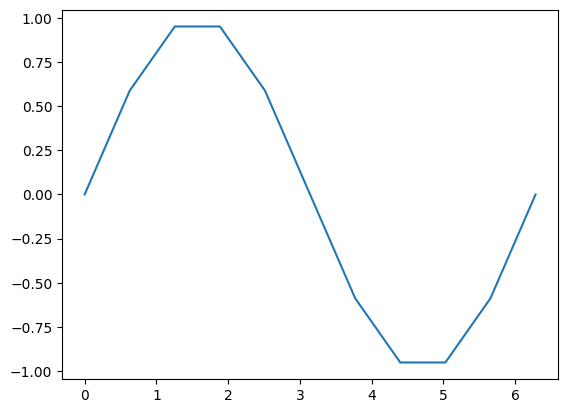

In [ ]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())
print(b)

In [ ]:
c = 2 * b
print(c)

d = c + 6
print(d)

tensor([ 0.0000e+00,  1.1756e+00,  1.9021e+00,  1.9021e+00,  1.1756e+00,
        -1.7485e-07, -1.1756e+00, -1.9021e+00, -1.9021e+00, -1.1756e+00,
         3.4969e-07], grad_fn=<MulBackward0>)
tensor([6.0000, 7.1756, 7.9021, 7.9021, 7.1756, 6.0000, 4.8244, 4.0979, 4.0979,
        4.8244, 6.0000], grad_fn=<AddBackward0>)


In [ ]:
out = d.sum()
print(out)

tensor(66., grad_fn=<SumBackward0>)


In [ ]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7b68c3f486d0>, 0), (None, 0))
((<SinBackward0 object at 0x7b68c3f486d0>, 0), (None, 0))
((<AccumulateGrad object at 0x7b68fc666110>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000,  1.6180,  0.6180, -0.6180, -1.6180, -2.0000, -1.6180, -0.6180,
         0.6180,  1.6180,  2.0000])


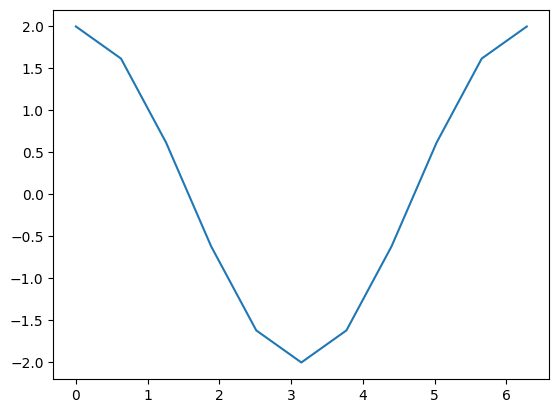

In [ ]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

In [ ]:
batchsize = 16
dimin = 1000
hidden_size = 100
dim_out = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(dimin, hidden_size)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(hidden_size, dim_out)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(batchsize, dimin, requires_grad=False)
ideal_output = torch.randn(batchsize, dim_out, requires_grad=False)

model = TinyModel()

In [ ]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0431, -0.0034,  0.0867,  0.0746,  0.0915,  0.0894,  0.0775, -0.0326,
        -0.0769, -0.0532], grad_fn=<SliceBackward0>)
None


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(146.1797, grad_fn=<SumBackward0>)


In [ ]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0431, -0.0034,  0.0867,  0.0746,  0.0915,  0.0894,  0.0775, -0.0326,
        -0.0769, -0.0532], grad_fn=<SliceBackward0>)
tensor([ 0.7154, -0.1626,  1.4067,  2.0909,  2.4679,  2.1816, -0.5481, -0.6461,
        -2.6232,  3.0358])


In [ ]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0452, -0.0029,  0.0825,  0.0684,  0.0841,  0.0829,  0.0791, -0.0307,
        -0.0690, -0.0623], grad_fn=<SliceBackward0>)
tensor([ 0.7154, -0.1626,  1.4067,  2.0909,  2.4679,  2.1816, -0.5481, -0.6461,
        -2.6232,  3.0358])


In [ ]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([ 0.7154, -0.1626,  1.4067,  2.0909,  2.4679,  2.1816, -0.5481, -0.6461,
        -2.6232,  3.0358])
tensor([  1.2292,   5.3973, -18.2695, -12.6618,  -8.6268, -19.2252, -38.3741,
        -10.7087, -20.5103,  -6.6339])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [ ]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [ ]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.1419, 0.9415, 0.1562, 0.4742, 0.7396], requires_grad=True)
tensor([0.1419, 0.9415, 0.1562, 0.4742, 0.7396])


In [ ]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        50.59%       7.473ms        50.59%       7.473ms       7.473us          1000  
    aten::mul        49.41%       7.298ms        49.41%       7.298ms       7.298us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 14.771ms



In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ -955.9010, -1597.2692,  -550.2748], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [ ]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.3414]), tensor([0.7679]))


(tensor([[2.8140]]), tensor([[3.]]))

In [ ]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.8300, 0.9522, 0.1618]), tensor([0.3013, 0.4645, 0.3017]))


(tensor([[4.5866, 0.0000, 0.0000],
         [0.0000, 5.1828, 0.0000],
         [0.0000, 0.0000, 2.3512]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

In [ ]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 100:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([-64.2185,  24.6742, 109.0143]),
 tensor([5.1200e+01, 5.1200e+02, 5.1200e-02]))

Building Models with PyTorch

In [ ]:
import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
Parameter containing:
tensor([[-0.0384, -0.0012,  0.0695,  ...,  0.0407,  0.0263, -0.0716],
        [-0.0687, -0.0700, -0.0678,  ...,  0.0689,  0.0579,  0.0708],
        [ 0.0777, -0.0282,  0.0298,  ..., -0.0009,  0.0976,  0.0849],
        ...,
        [ 0.0098, -0.0611, -0.0595,  ...,  0.0989,  0.0878,  0.0511],
        [-0.0622,  0.0942,  0.0737,  ..., -0.0621, -0.0118,  0.0087],
        [-0.0365, -0.0369,  0.0509,  ..., -0.0542,  0.0065,  0.0350]],
       requires_grad=True)
Parameter containing:
tensor([-0.0013, -0.0886,  0.0874,  0.0262,  0.0779,  0.0943, -0.0518,  0.0015,
        -0.0639,  0.0059,  0.0801, -0.0557, -0.0267, -0.0524, -0.0400,  0.0245,
         0.0086,  0.0430,  0.0939, -0.02

In [ ]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.8963, 0.0197, 0.3508]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.5006,  0.0564,  0.4051],
        [ 0.2543, -0.2436, -0.1951]], requires_grad=True)
Parameter containing:
tensor([-0.0498,  0.3696], requires_grad=True)


Output:
tensor([[0.5421, 0.5243]], grad_fn=<AddmmBackward0>)


In [ ]:
import torch.nn.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()

        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.6242, 0.3789, 0.1763, 0.8325, 0.3524, 0.5907],
         [0.1966, 0.0132, 0.7880, 0.0753, 0.3551, 0.7635],
         [0.7128, 0.2634, 0.2844, 0.8714, 0.1765, 0.2078],
         [0.7763, 0.2959, 0.0591, 0.6696, 0.8175, 0.0012],
         [0.8226, 0.5234, 0.3188, 0.5423, 0.9614, 0.1158],
         [0.4855, 0.7379, 0.5306, 0.8078, 0.1845, 0.8773]]])
tensor([[[0.7880, 0.8714],
         [0.8226, 0.9614]]])


In [ ]:
my_tensor = torch.rand(1, 4, 4) * 20 + 1
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[ 2.9005,  5.1714, 16.5570,  1.3733],
         [14.9157, 19.1503,  5.3064, 13.7674],
         [18.4731, 13.9352, 15.7733, 19.3068],
         [18.0373,  4.4239,  1.9812, 18.3225]]])
tensor(11.8372)
tensor([[[-0.6039, -0.2230,  1.6870, -0.8601],
         [ 0.3246,  1.1675, -1.5882,  0.0960],
         [ 0.7480, -1.3722, -0.5134,  1.1375],
         [ 0.9744, -0.8313, -1.1553,  1.0122]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(9.6858e-08, grad_fn=<MeanBackward0>)


In [ ]:
my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[0.0000, 0.0000, 1.2344, 0.1604],
         [1.0208, 0.3284, 0.3972, 0.0000],
         [0.0000, 0.6798, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.6529, 0.3780]]])
tensor([[[0.2806, 0.6650, 0.0000, 0.0000],
         [0.0000, 0.3284, 0.3972, 0.9988],
         [0.9608, 0.6798, 1.3219, 0.9869],
         [0.7618, 0.6068, 1.6529, 0.3780]]])


PyTorch TensorBoard Support

In [ ]:
pip install torch torchvision matplotlib tensorboard

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


import torchvision
import torchvision.transforms as transforms


import matplotlib.pyplot as plt
import numpy as np

from torch.utils.tensorboard import SummaryWriter


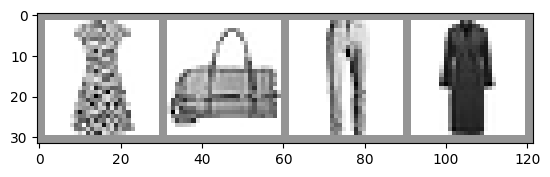

In [ ]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [ ]:

writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()


# ...and open a browser tab to http://localhost:6006/

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            net.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Switching back to training mode, eg. turning on regularisation

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


In [ ]:
dataiter = iter(training_loader)
images, labels = next(dataiter)


writer.add_graph(net, images)
writer.flush()

In [ ]:
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

Training with PyTorch

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


Ankle Boot  Sandal  Ankle Boot  Trouser


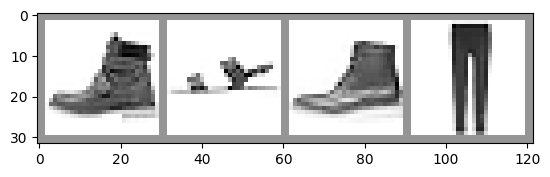

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()


dummy_outputs = torch.rand(4, 10)
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.6287, 0.3210, 0.9274, 0.9568, 0.1647, 0.4879, 0.5486, 0.3511, 0.2943,
         0.5618],
        [0.2383, 0.9147, 0.1181, 0.3391, 0.0221, 0.3166, 0.5803, 0.2019, 0.1237,
         0.6453],
        [0.8934, 0.6662, 0.4614, 0.6658, 0.4451, 0.8279, 0.3541, 0.5420, 0.7669,
         0.8404],
        [0.9455, 0.1472, 0.7369, 0.8927, 0.0789, 0.6023, 0.6354, 0.7401, 0.1983,
         0.0582]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.3321938514709473


In [ ]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)

In [ ]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [ ]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 1.892701979458332
  batch 2000 loss: 0.7970978945679963
  batch 3000 loss: 0.6690071099791676
  batch 4000 loss: 0.622792920938693
  batch 5000 loss: 0.5757326579990331
  batch 6000 loss: 0.5323678415897303
  batch 7000 loss: 0.5196948726550908
  batch 8000 loss: 0.5009010981675237
  batch 9000 loss: 0.48510352315020283
  batch 10000 loss: 0.4659716321353335
  batch 11000 loss: 0.4422279045355972
  batch 12000 loss: 0.45981282089732123
  batch 13000 loss: 0.4420980500666192
  batch 14000 loss: 0.4110318929924397
  batch 15000 loss: 0.4157077753261256
LOSS train 0.4157077753261256 valid 0.4203327000141144
EPOCH 2:
  batch 1000 loss: 0.3932708742398681
  batch 2000 loss: 0.40885119397740344
  batch 3000 loss: 0.40809595409285976
  batch 4000 loss: 0.37486330900306347
  batch 5000 loss: 0.36756745251303075
  batch 6000 loss: 0.3627097491445456
  batch 7000 loss: 0.36704345590097365
  batch 8000 loss: 0.37816061602390255
  batch 9000 loss: 0.357398619224492
  ba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Crime_Incidents_20260204.csv'
df = pd.read_csv(path, engine='python', on_bad_lines='skip')

df.head(3
)

,Case Number,Incident Datetime,Incident ID,Incident Type Primary,Incident Description,Parent Incident Type,Hour of Day,Day of Week,Address,City,...,Census Block Group,Census Block,2010 Census Tract,2010 Census Block Group,2010 Census Block,Police District,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,25-2270290,2025 Aug 15 08:52:15 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,8,Friday,100 Block HIGHGATE AV,Buffalo,...,3,3002,47,5,5004,District E,004702,36029004702,360290047023,360290047023002
1,25-2140519,2025 Aug 02 12:18:00 PM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,12,Saturday,400 Block GRANT ST,Buffalo,...,2,2002,171,2,2002,District D,017100,36029017100,360290171002,360290171002002
2,26-0180495,2026 Jan 18 03:00:00 AM,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,15,Sunday,1300 Block HERTEL AV,Buffalo,...,1,1002,49,3,3002,District D,004901,36029004901,360290049011,360290049011002


In [ ]:
print(df.dtypes)

#
'''From this i could observe that there numerous attributes , however it is pretty inconsistent and inorder to process it
we can remove the spaces after the words, convert all the values(column) to lowercase and also add '_' between two words
so that it becomes standardized
'''

Case Number                 object
Incident Datetime           object
Incident ID                float64
Incident Type Primary       object
Incident Description        object
Parent Incident Type        object
Hour of Day                  int64
Day of Week                 object
Address                     object
City                        object
State                       object
Location                    object
Latitude                    object
Longitude                   object
Created At                  object
updated_at                 float64
zip_code                    object
neighborhood                object
Council District            object
Council District 2011       object
Census Tract                object
Census Block Group          object
Census Block                object
2010 Census Tract           object
2010 Census Block Group     object
2010 Census Block           object
Police District             object
TRACTCE20                   object
GEOID20_tract       

"From this i could observe that there numerous attributes , however it is pretty inconsistent and inorder to process it\nwe can remove the spaces after the words, convert all the values(column) to lowercase and also add '_' between two words\nso that it becomes standardized\n"

In [ ]:
print(df['Police District'])

0         District E
1         District D
2         District D
3         District B
4         District E
             ...    
284494    District A
284495    District D
284496    District C
284497    District C
284498    District E
Name: Police District, Length: 284499, dtype: object


In [ ]:
df.columns = df.columns.str.strip()
print('Removing spaces: \n',df.columns)
df.columns = df.columns.str.lower()
print('Converting to lower: \n',df.columns)
df.columns = df.columns.str.replace(' ', '_')
print('Adding "_" between words: \n',df.columns)

#Now all the features(the columns names have been standardized)

Removing spaces: 
 Index(['Case Number', 'Incident Datetime', 'Incident ID',
       'Incident Type Primary', 'Incident Description', 'Parent Incident Type',
       'Hour of Day', 'Day of Week', 'Address', 'City', 'State', 'Location',
       'Latitude', 'Longitude', 'Created At', 'updated_at', 'zip_code',
       'neighborhood', 'Council District', 'Council District 2011',
       'Census Tract', 'Census Block Group', 'Census Block',
       '2010 Census Tract', '2010 Census Block Group', '2010 Census Block',
       'Police District', 'TRACTCE20', 'GEOID20_tract', 'GEOID20_blockgroup',
       'GEOID20_block'],
      dtype='object')
Converting to lower: 
 Index(['case number', 'incident datetime', 'incident id',
       'incident type primary', 'incident description', 'parent incident type',
       'hour of day', 'day of week', 'address', 'city', 'state', 'location',
       'latitude', 'longitude', 'created at', 'updated_at', 'zip_code',
       'neighborhood', 'council district', 'council di

In [ ]:
print('Checking Datetype whetheer we need to convert to pandas datetime format or not')
print('Created at: \n',df['created_at'])
print('Updated at: \n',df['updated_at'])
print('Incident datetime: \n',df['incident_datetime'])
print('Hour of day: \n',df['hour_of_day'])

'''Based on the below we could convert Created at and Incident datetime to pandas datetime format'''

Checking Datetype whetheer we need to convert to pandas datetime format or not
Created at: 
 0         2025 Aug 15 08:53:15 AM
1         2025 Aug 02 12:19:56 PM
2         2026 Jan 18 03:01:00 PM
3         2025 Dec 03 08:04:59 PM
4         2025 Jul 15 02:43:46 PM
                   ...           
284494                        NaN
284495    2015 Dec 24 04:46:00 AM
284496    2017 Nov 08 07:05:00 AM
284497                        NaN
284498                        NaN
Name: created_at, Length: 284499, dtype: object
Updated at: 
 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
284494   NaN
284495   NaN
284496   NaN
284497   NaN
284498   NaN
Name: updated_at, Length: 284499, dtype: float64
Incident datetime: 
 0         2025 Aug 15 08:52:15 AM
1         2025 Aug 02 12:18:00 PM
2         2026 Jan 18 03:00:00 AM
3         2025 Dec 03 08:30:59 AM
4         2025 Jun 15 12:00:46 AM
                   ...           
284494    2017 Aug 08 08:29:00 AM
284495    2015 Jul 1

'Based on the below we could convert Created at and Incident datetime to pandas datetime format'

In [ ]:
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'], errors='coerce')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
print('Converted to pandas datetime format: \n',df['incident_datetime'])
print('Converted to pandas datetime format: \n',df['created_at'])

Converted to pandas datetime format: 
 0        2025-08-15 08:52:15
1        2025-08-02 12:18:00
2        2026-01-18 03:00:00
3        2025-12-03 08:30:59
4        2025-06-15 00:00:46
                 ...        
284494   2017-08-08 08:29:00
284495   2015-07-19 00:00:00
284496   2017-11-07 10:40:00
284497   2014-01-14 19:40:00
284498   2014-02-13 21:14:00
Name: incident_datetime, Length: 284499, dtype: datetime64[ns]
Converted to pandas datetime format: 
 0        2025-08-15 08:53:15
1        2025-08-02 12:19:56
2        2026-01-18 15:01:00
3        2025-12-03 20:04:59
4        2025-07-15 14:43:46
                 ...        
284494                   NaT
284495   2015-12-24 04:46:00
284496   2017-11-08 07:05:00
284497                   NaT
284498                   NaT
Name: created_at, Length: 284499, dtype: datetime64[ns]


In [ ]:
print(df['latitude'])
print(df['longitude'])

'''The above values are ideally supposed to be numeric , hence converting them to
numeric format'''

0         42.949
1         42.927
2         42.947
3         42.903
4         42.921
           ...  
284494    42.854
284495    42.949
284496    42.882
284497    42.889
284498    42.925
Name: latitude, Length: 284499, dtype: object
0         -78.823
1          -78.89
2         -78.859
3         -78.863
4         -78.848
           ...   
284494    -78.807
284495     -78.86
284496    -78.833
284497    -78.813
284498    -78.814
Name: longitude, Length: 284499, dtype: object


'The above values are ideally supposed to be numeric , hence converting them to\nnumeric format'

In [ ]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
print('Converted to numeric format: \n',df['latitude'])
print('Converted to numeric format: \n',df['longitude'])

Converted to numeric format: 
 0         42.949
1         42.927
2         42.947
3         42.903
4         42.921
           ...  
284494    42.854
284495    42.949
284496    42.882
284497    42.889
284498    42.925
Name: latitude, Length: 284499, dtype: float64
Converted to numeric format: 
 0        -78.823
1        -78.890
2        -78.859
3        -78.863
4        -78.848
           ...  
284494   -78.807
284495   -78.860
284496   -78.833
284497   -78.813
284498   -78.814
Name: longitude, Length: 284499, dtype: float64


In [ ]:
#Describing the dataset
print(df.describe())


                   incident_datetime  incident_id   hour_of_day  \
count                         284499          0.0  284499.00000   
mean   2014-05-29 08:45:27.342212352          NaN      11.91090   
min              1910-12-22 00:00:00          NaN       0.00000   
25%              2009-09-18 17:52:30          NaN       6.00000   
50%              2013-05-29 05:41:00          NaN      13.00000   
75%              2019-01-08 00:00:00          NaN      18.00000   
max              2026-02-03 10:09:24          NaN      23.00000   
std                              NaN          NaN       7.20003   

            latitude      longitude                     created_at  updated_at  
count  284499.000000  284499.000000                          65130         0.0  
mean       42.911736     -78.849872  2018-01-16 10:57:59.716490240         NaN  
min        42.596000     -79.028000            2009-10-01 01:00:00         NaN  
25%        42.894000     -78.877000            2012-11-19 07:00:00      

In [ ]:
#Finding Missing values
print(df.isnull().sum())

case_number                     0
incident_datetime               0
incident_id                284499
incident_type_primary           0
incident_description            0
parent_incident_type            0
hour_of_day                     0
day_of_week                     0
address                        36
city                            0
state                           0
location                     6356
latitude                        0
longitude                       0
created_at                 219369
updated_at                 284499
zip_code                     2062
neighborhood                 3017
council_district             2113
council_district_2011        2062
census_tract                 3017
census_block_group           3017
census_block                 3017
2010_census_tract            3017
2010_census_block_group      3017
2010_census_block            3017
police_district              3017
tractce20                    2883
geoid20_tract                2883
geoid20_blockg

In a Markdown cell, provide brief details about the nature of your dataset. What is it
about? What type of data are you encountering?

- I could see there are 31 columns firstly, and the dataset im working on is buffalo crime . It basically indicates the time , date , location timestamp and other essential details where the crime has occured and has been importantly "recorded" . As part of preprocessing, firstly i converted all the columns to a standard name template, checked the number of null values present so that i could later handle them. There are about 2,84,499 records/rows inside and based on that i would be training my model on this dataset.


Data cleaning

In [ ]:
#Handling missing values on columns
df = df.drop(["incident_id", "updated_at"], axis=1, errors="ignore")
print(df.columns)

Index(['case_number', 'incident_datetime', 'incident_type_primary',
       'incident_description', 'parent_incident_type', 'hour_of_day',
       'day_of_week', 'address', 'city', 'state', 'location', 'latitude',
       'longitude', 'created_at', 'zip_code', 'neighborhood',
       'council_district', 'council_district_2011', 'census_tract',
       'census_block_group', 'census_block', '2010_census_tract',
       '2010_census_block_group', '2010_census_block', 'police_district',
       'tractce20', 'geoid20_tract', 'geoid20_blockgroup', 'geoid20_block'],
      dtype='object')


In [ ]:
'''Need to handle missing values present in created at since the count is pretty high ,
we can check if there are columns with more than 65% data missing it , if yes remove it
'''

col_with_nullvalues = df.isna().mean()
cols_to_drop = col_with_nullvalues[col_with_nullvalues > 0.65].index
df = df.drop(cols_to_drop, axis=1)

print('After removing columns with more than 65% of null values: \n',df.isnull().sum())



After removing columns with more than 65% of null values: 
 case_number                   0
incident_datetime             0
incident_type_primary         0
incident_description          0
parent_incident_type          0
hour_of_day                   0
day_of_week                   0
address                      36
city                          0
state                         0
location                   6356
latitude                      0
longitude                     0
zip_code                   2062
neighborhood               3017
council_district           2113
council_district_2011      2062
census_tract               3017
census_block_group         3017
census_block               3017
2010_census_tract          3017
2010_census_block_group    3017
2010_census_block          3017
police_district            3017
tractce20                  2883
geoid20_tract              2883
geoid20_blockgroup         2883
geoid20_block              2883
dtype: int64


----INITIALLY----
I had considered hour of the day as my target variable and was considering it because i thought it would be linear and easy to predict, however while training i was aware that it has to predict 0-23 classes which could be a bit difficult and even after trying various methods , my accuracy never reached more than 70% as needed. hence i decided to change my target variable and decided to keep the new one and from that i was able to interpret the number of classes it has and comparitevly how could it be easier

In [ ]:
# Drop rows where target is missing
df = df.dropna(subset=['police_district'])

# Check remaining rows
print(df.shape)
print(df['police_district'].isna().sum())
print('After removing columns with more than 65% of null values: \n',df.isnull().sum())


(281482, 28)
0
After removing columns with more than 65% of null values: 
 case_number                   0
incident_datetime             0
incident_type_primary         0
incident_description          0
parent_incident_type          0
hour_of_day                   0
day_of_week                   0
address                      36
city                          0
state                         0
location                   3339
latitude                      0
longitude                     0
zip_code                    650
neighborhood                  0
council_district            701
council_district_2011       650
census_tract                  0
census_block_group            0
census_block                  0
2010_census_tract             0
2010_census_block_group       0
2010_census_block             0
police_district               0
tractce20                     0
geoid20_tract                 0
geoid20_blockgroup            0
geoid20_block                 0
dtype: int64


In [ ]:
df = df.drop(["location", "address"], axis=1, errors="ignore")
print('After removing columns with more than 65% of null values: \n',df.isnull().sum())


After removing columns with more than 65% of null values: 
 case_number                  0
incident_datetime            0
incident_type_primary        0
incident_description         0
parent_incident_type         0
hour_of_day                  0
day_of_week                  0
city                         0
state                        0
latitude                     0
longitude                    0
zip_code                   650
neighborhood                 0
council_district           701
council_district_2011      650
census_tract                 0
census_block_group           0
census_block                 0
2010_census_tract            0
2010_census_block_group      0
2010_census_block            0
police_district              0
tractce20                    0
geoid20_tract                0
geoid20_blockgroup           0
geoid20_block                0
dtype: int64


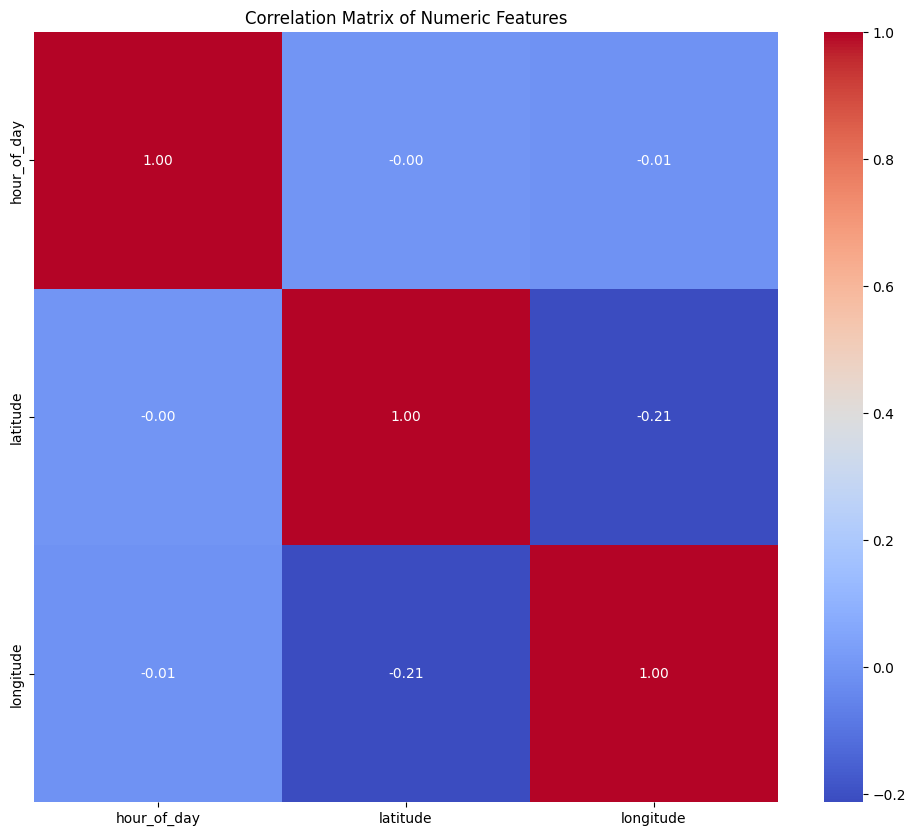

In [ ]:
#Actually below would now not be needed since im not considering any numerical feature as my target variabel

# Select only actual numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only actual numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
# Compute correlation matrix

print(corr_matrix)




             hour_of_day  latitude  longitude
hour_of_day     1.000000 -0.003476  -0.010305
latitude       -0.003476  1.000000  -0.212110
longitude      -0.010305 -0.212110   1.000000


In [ ]:
# Compute correlation matrix
corr_matrix = df[numeric_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Columns to drop due to high correlation:", to_drop)


df_reduced = df.drop(columns=to_drop)


Columns to drop due to high correlation: []


In [ ]:
#Handling outliers

print(df.columns)

'''#

From the dataset i could interpret , or have an intuition that i have selected all the dates before 1950-01 to be outliers
hence removing
df.loc[df["incident_datetime"] < "1950-01-01", "incident_datetime"] = pd.NaT

# check if hours of date has no values after 23 as it would be incorrect

assert df["hour_of_day"].between(0, 23).all(), "hour_of_day has outliers"'''


Index(['case_number', 'incident_datetime', 'incident_type_primary',
       'incident_description', 'parent_incident_type', 'hour_of_day',
       'day_of_week', 'city', 'state', 'latitude', 'longitude', 'zip_code',
       'neighborhood', 'council_district', 'council_district_2011',
       'census_tract', 'census_block_group', 'census_block',
       '2010_census_tract', '2010_census_block_group', '2010_census_block',
       'police_district', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block'],
      dtype='object')


'#\n\nFrom the dataset i could interpret , or have an intuition that i have selected all the dates before 1950-01 to be outliers\nhence removing\ndf.loc[df["incident_datetime"] < "1950-01-01", "incident_datetime"] = pd.NaT\n\n# check if hours of date has no values after 23 as it would be incorrect\n\nassert df["hour_of_day"].between(0, 23).all(), "hour_of_day has outliers"'

Visualization

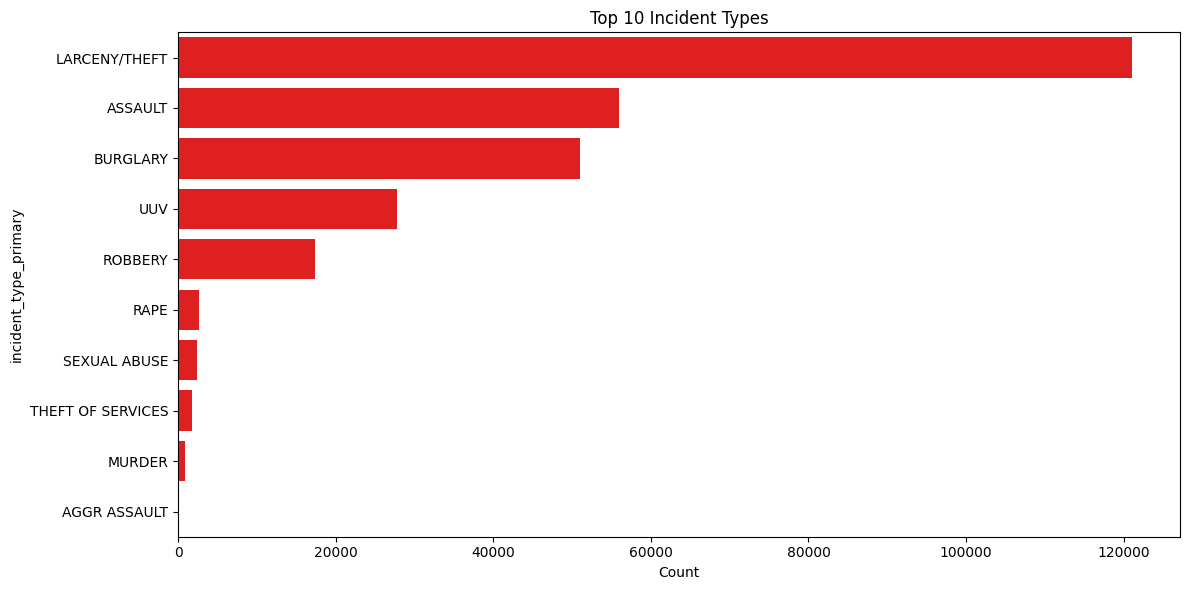

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_types = df['incident_type_primary'].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index,color='red')
plt.title('Top 10 Incident Types')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In the above we can see on what basis the the crime has been reported and the estimated number, its a asimple bar plot indicating that larceny/theft has the highest number of crime recorded estimating it to be more than 120000>

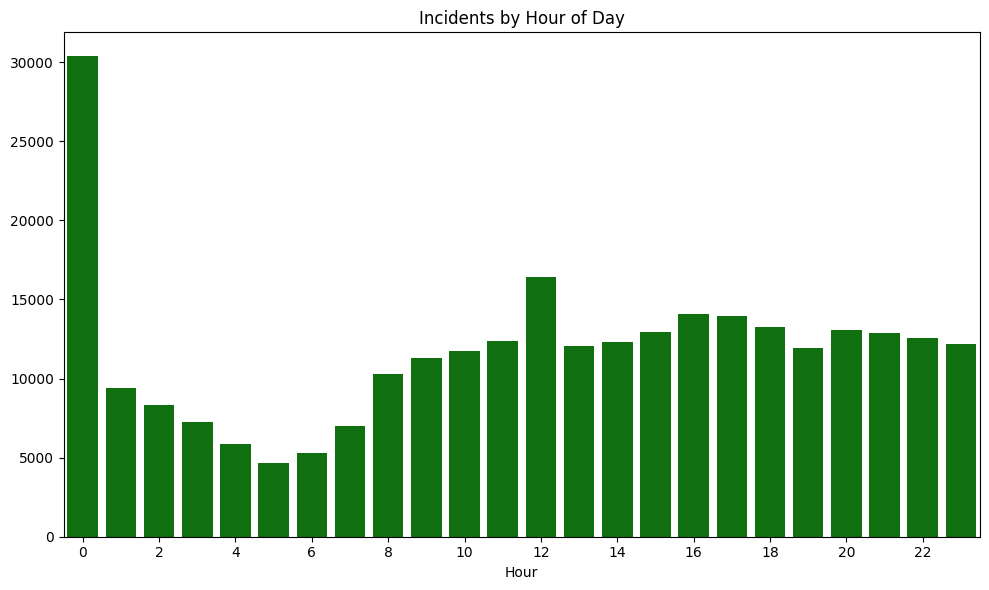

In [ ]:
plt.figure(figsize=(10, 6))
hour_counts = df['hour_of_day'].value_counts().sort_index()
sns.barplot(x=hour_counts.index, y=hour_counts.values,color='green')
plt.title('Incidents by Hour of Day')
plt.xlabel('Hour')
plt.xticks(range(0,24,2))
plt.tight_layout()
plt.show()


Usuallly at midnight we can see that the number is staggering high indicating crimes to be happening at that hour of the day, and eventually very low fir the rest of the hours

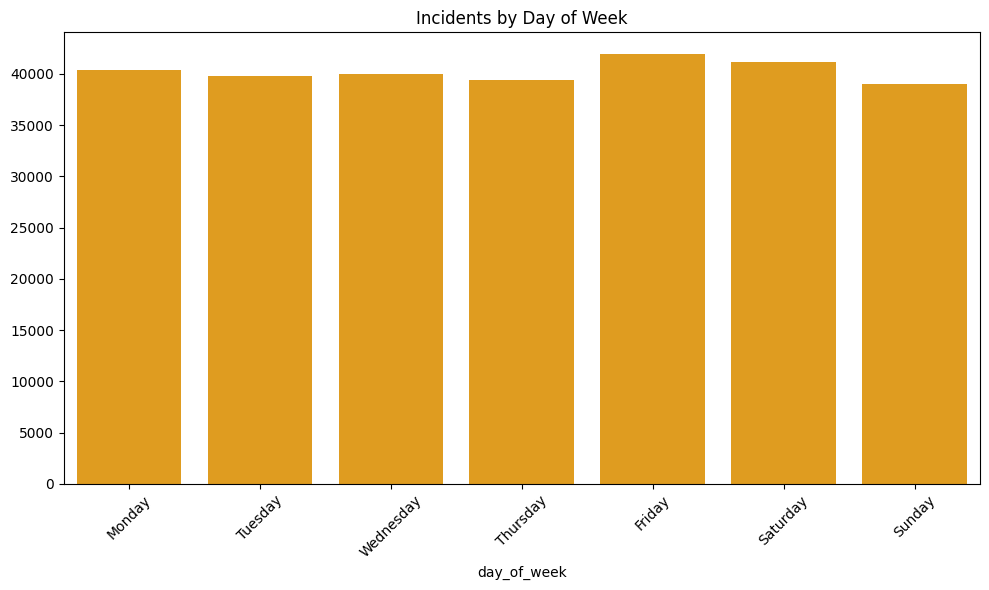

In [ ]:
plt.figure(figsize=(10, 6))
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)
sns.barplot(x=day_counts.index, y=day_counts.values,color='orange')
plt.title('Incidents by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


All the days crime has been on a high scale, but on Fridays we can see the rate is bit more higher considering (intuition) - It is a start of the  weekend and would find most people out celebrating

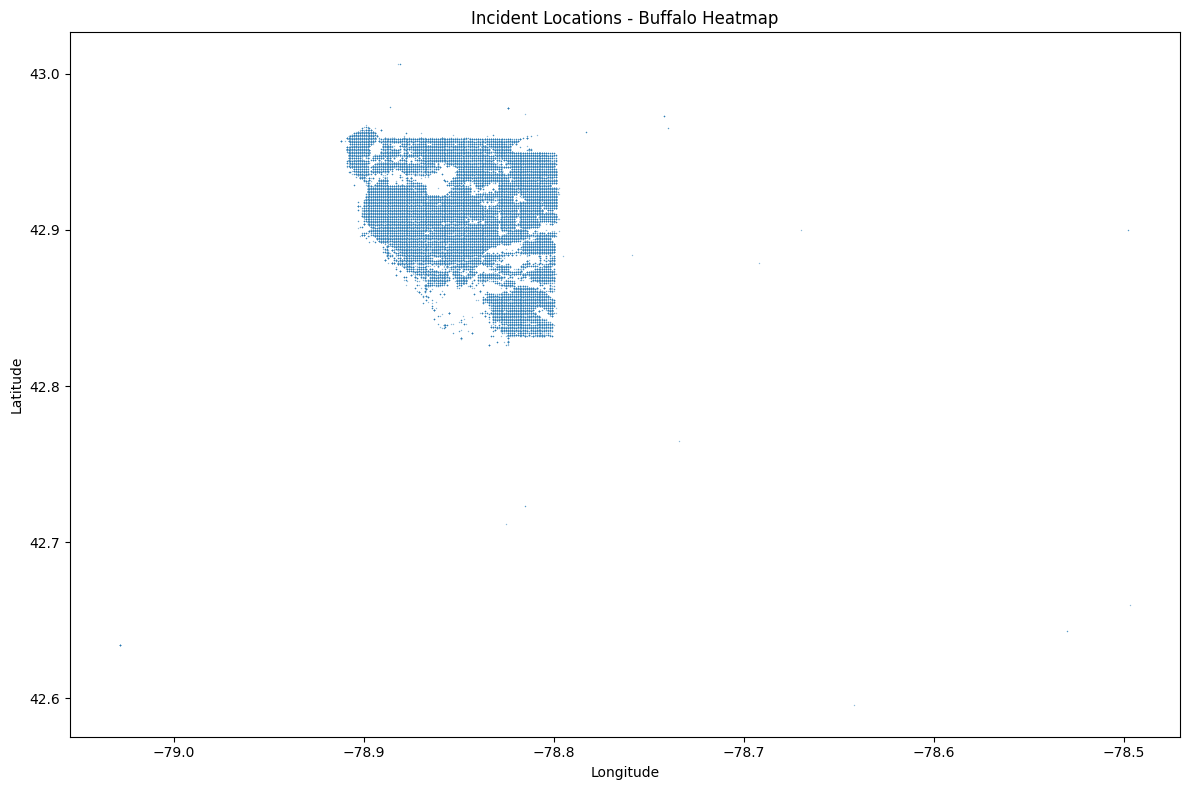

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df.dropna(subset=['latitude','longitude']),
                x='longitude', y='latitude', alpha=0.5, s=1)
plt.title('Incident Locations - Buffalo Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


Shows the primary location based on the longitude and latitude where the crime rate can be seen

Top 15 types: 
 Index(['LARCENY/THEFT', 'ASSAULT', 'BURGLARY', 'UUV', 'ROBBERY', 'RAPE',
       'SEXUAL ABUSE', 'THEFT OF SERVICES', 'MURDER', 'Assault',
       'AGGR ASSAULT', 'CRIM NEGLIGENT HOMICIDE', 'Breaking & Entering',
       'Theft', 'Sexual Assault'],
      dtype='object', name='incident_type_primary')


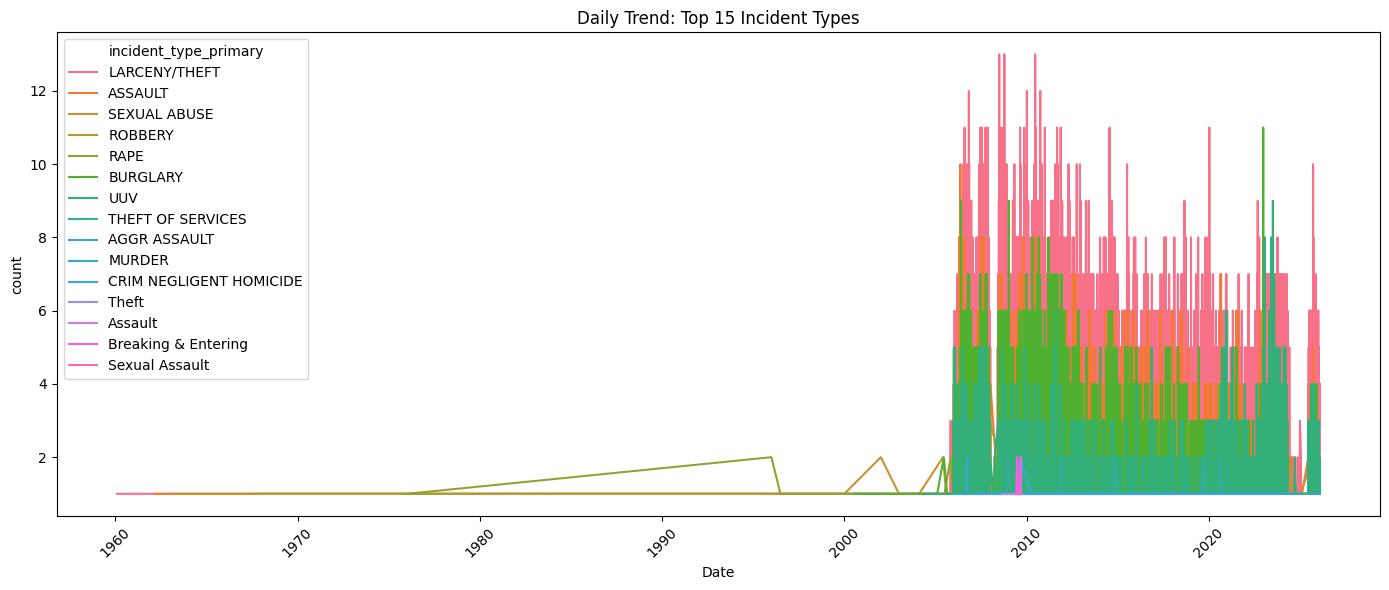

In [ ]:
df_sample = df.sample(50000)  # Sample for speed
df_sample['date'] = df_sample['incident_datetime'].dt.date
daily_incidents = df_sample.groupby(['date', 'incident_type_primary']).size().reset_index(name='count')
top15_types = daily_incidents['incident_type_primary'].value_counts().head(15).index
print('Top 15 types: \n',top15_types)
daily_incidents = daily_incidents[daily_incidents['incident_type_primary'].isin(top15_types)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_incidents, x='date', y='count', hue='incident_type_primary')

plt.title('Daily Trend: Top 15 Incident Types')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Depecting the year and the corresponding crime reported based on the incident type to indicate that crimes rates have now been rapidly increaed mid 2010 and was very less prior to it

Feature Engineering

Considering Target column as police district hence dropping irrelevant columns

In [ ]:
df['police_district'].value_counts()


,count
police_district,
District D,66412
District E,64489
District B,64151
District C,50440
District A,33191
UNKNOWN,2799


In [ ]:
cols_to_drop_manual = [
    'case_number', 'incident_datetime', 'city', 'state',
    'zip_code', 'census_tract', 'census_block_group', 'census_block',
    '2010_census_tract', '2010_census_block_group', '2010_census_block',
    'tractce20', 'geoid20_tract', 'geoid20_blockgroup', 'geoid20_block',
    'location', 'address', 'incident_description'  # optional textual info
]
df = df.drop(columns=[c for c in cols_to_drop_manual if c in df.columns])

In [ ]:
numeric_cols = ['latitude', 'longitude', 'hour_of_day']
categorical_cols = ['incident_type_primary', 'parent_incident_type', 'day_of_week', 'neighborhood']
target_col = 'police_district'

#Necessasry to fill the categorical values
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('unknown')

#Numeric all values checking again
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with any remaining numeric NaNs
df = df.dropna(subset=numeric_cols)

In [ ]:
#Scaling and Label encoding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


#Definging x and Y
X = df[numeric_cols + [c for c in categorical_cols if c in df.columns]]
y = df[target_col]



#X = df[numeric_cols + [c for c in categorical_cols if c not in df.columns]]



# Drop rows where numeric columns became NaN
X = X.dropna(subset=numeric_cols)
y = y[X.index]  # Keep target aligned


for col in categorical_cols:
    if col in X.columns:
        X[col] = X[col].fillna('unknown')


# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, columns=[c for c in categorical_cols if c in X.columns], drop_first=True)

#Keeping all the values to float32 to ensure to typemismatch error
X = X.astype(np.float32)


scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])





In [ ]:
from sklearn.model_selection import train_test_split


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (168888, 74)
X_val shape: (56297, 74)
X_test shape: (56297, 74)
y_train shape: (168888,)
y_val shape: (56297,)
y_test shape: (56297,)


In [ ]:
#print(X_train.dtypes)
#print(X_train.head(1))

print(y_train)

[2 2 2 ... 1 4 0]


In [ ]:
#Converting to tensor
import torch



X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")


X_train_tensor shape: torch.Size([168888, 74])
y_train_tensor shape: torch.Size([168888])
X_val_tensor shape: torch.Size([56297, 74])
y_val_tensor shape: torch.Size([56297])
X_test_tensor shape: torch.Size([56297, 74])
y_test_tensor shape: torch.Size([56297])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader


batch_size = 512
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)


In [ ]:
#Defining neural network
#Using Relu as activation function

import torch.nn as nn
import torch.optim as optim

class PoliceDistrictNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)




input_dim = X_train_tensor.shape[1]


num_classes = len(np.unique(y_train))  # number of police districts

print(input_dim, num_classes)


74 6


In [ ]:
model = PoliceDistrictNN(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Training the model

import time

num_epochs = 20
best_val_acc = 0.0

train_losses = []
val_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(train_loss)

    # Validation part
    model.eval()
    val_loss_total = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model(X_val_batch)
            val_loss = criterion(val_outputs, y_val_batch)
            val_loss_total += val_loss.item() * X_val_batch.size(0)

            _, predicted_val = torch.max(val_outputs, 1)
            correct_val += (predicted_val == y_val_batch).sum().item()
            total_val += y_val_batch.size(0)

    val_loss = val_loss_total / len(val_loader.dataset)
    val_acc = correct_val / total_val
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_police_district_model.pth")

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")


Epoch 1/20 | Train Loss: 0.4553, Train Acc: 0.8533 | Val Loss: 0.1477, Val Acc: 0.9372
Epoch 2/20 | Train Loss: 0.1437, Train Acc: 0.9400 | Val Loss: 0.1465, Val Acc: 0.9385
Epoch 3/20 | Train Loss: 0.1403, Train Acc: 0.9415 | Val Loss: 0.1402, Val Acc: 0.9397
Epoch 4/20 | Train Loss: 0.1380, Train Acc: 0.9424 | Val Loss: 0.1429, Val Acc: 0.9418
Epoch 5/20 | Train Loss: 0.1353, Train Acc: 0.9440 | Val Loss: 0.1353, Val Acc: 0.9424
Epoch 6/20 | Train Loss: 0.1333, Train Acc: 0.9450 | Val Loss: 0.1323, Val Acc: 0.9492
Epoch 7/20 | Train Loss: 0.1304, Train Acc: 0.9473 | Val Loss: 0.1330, Val Acc: 0.9448
Epoch 8/20 | Train Loss: 0.1276, Train Acc: 0.9484 | Val Loss: 0.1304, Val Acc: 0.9459
Epoch 9/20 | Train Loss: 0.1238, Train Acc: 0.9517 | Val Loss: 0.1235, Val Acc: 0.9507
Epoch 10/20 | Train Loss: 0.1205, Train Acc: 0.9527 | Val Loss: 0.1277, Val Acc: 0.9479
Epoch 11/20 | Train Loss: 0.1161, Train Acc: 0.9551 | Val Loss: 0.1243, Val Acc: 0.9431
Epoch 12/20 | Train Loss: 0.1130, Train A

In [ ]:
model.load_state_dict(torch.load("best_police_district_model.pth"))
model.eval()

correct_test = 0
total_test = 0
with torch.no_grad():
    for X_test_batch, y_test_batch in test_loader:
        outputs = model(X_test_batch)
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == y_test_batch).sum().item()
        total_test += y_test_batch.size(0)

test_acc = correct_test / total_test
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9670


In [ ]:
torch.save(model.state_dict(), "police_district_model.pth")
import pickle
with open("a0_part_2_weights_rajagop6.pkl", "wb") as f:
    pickle.dump(le_target, f)


Comparing with ML model

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import time
import numpy as np
import torch

#Using X_train, X_val and Xtest which was initally used to split the data
X_train_np, y_train_np = X_train.values, y_train
X_val_np, y_val_np = X_val.values, y_val
X_test_np, y_test_np = X_test.values, y_test

#to store results
results = {}


start = time.time()

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_np, y_train_np)


rf_time = time.time() - start

y_pred_rf = rf.predict(X_test_np)
y_prob_rf = rf.predict_proba(X_test_np)


rf_acc = accuracy_score(y_test_np, y_pred_rf)
rf_loss = log_loss(y_test_np, y_prob_rf)

results['Random Forest'] = {'Accuracy': rf_acc, 'Loss': rf_loss, 'Time': rf_time}
print(f"Random Forest - Accurcy: {rf_acc:.4f}, Loss: {rf_loss:.4f}, Time: {rf_time:.2f}s")


#Loading the best weightts
model.load_state_dict(torch.load("best_police_district_model.pth"))
model.eval()

correct_test = 0
total_test = 0
y_pred_nn = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred_nn.extend(predicted.numpy())
        correct_test += (predicted == y_batch).sum().item()
        total_test += y_batch.size(0)

nn_acc = correct_test / total_test

# Converting NN model predictions to probability for log_loss
y_pred_nn_prob = np.zeros((len(y_test), len(np.unique(y_test))))
for i, pred in enumerate(y_pred_nn):
    y_pred_nn_prob[i, pred] = 1.0


nn_loss = log_loss(y_test, y_pred_nn_prob)

results['Neural Network'] = {'Accuracy': nn_acc, 'Loss': nn_loss, 'Time': 'Training time logged before'}
print(f"Neural Network - Accuracy: {nn_acc:.4f}, Loss: {nn_loss:.4f}")




Random Forest - Accurcy: 0.9915, Loss: 0.0274, Time: 44.98s
Neural Network - Accuracy: 0.9670, Loss: 1.1902


Plot Loss and Accuracy graph

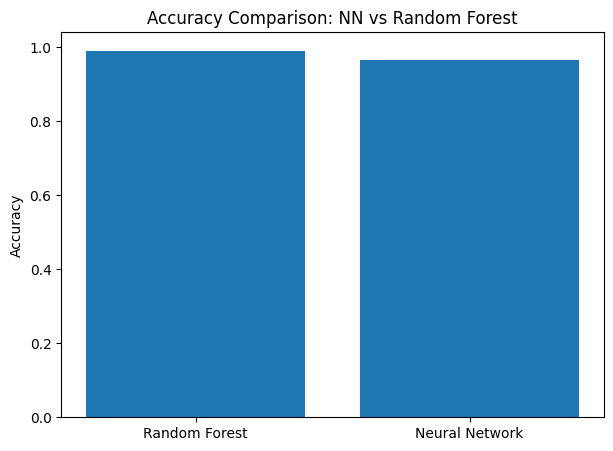

In [ ]:
#Plot Accuracy
plt.figure(figsize=(7,5))
plt.bar(results.keys(), [results[m]['Accuracy'] for m in results])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: NN vs Random Forest')
plt.show()


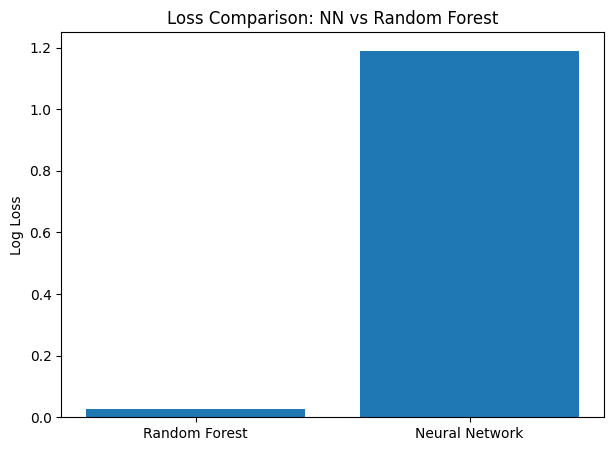

In [ ]:

#Plot Loss
plt.figure(figsize=(7,5))
plt.bar(results.keys(), [results[m]['Loss'] for m in results])
plt.ylabel('Log Loss')
plt.title('Loss Comparison: NN vs Random Forest')
plt.show()

References

1. https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
